I recently picked up guitar again after a long absence and wanted to start making some notes in a digital form. Unfortunately, I didn't find any good tools. There is TeX of course, which can do anything, but I was hoping for something a bit more WYSIWYGy. There are some very good tools availabe for musical scores (MuseScore, Frescobaldi), but I want something that is more like a traditional notebook with lots of notes interspersed with occasional musical notation (in both traditional and tablature forms).

So an obvious potential candidate is Jupyter (nee IPython), but it has no support for musical notation out of the box. But it is doable and in this post I'll walk through how I got it to work on my Mac. This is also my first attempt at using a Jupyter notebook as my blog post in Nikola so I'm kiling two birds with one stone.

I want something that is fairly easy to write the music in. MusicXML isn't too bad, except XML. What little I've seen of Liyponds markup looked pretty unfriendly for the simple use cases I have. A few days ago I stumbled across a Python library called abjad which looked just the ticket. As I write this I have it working for music on the staff but not tablature (I'm not sure it supports that) but I hope by the end of this post I'll have that figured out too!

Abjad relies on Lilypond, so first that has to be installed. It can be downloaded from http://lilypond.org/macos-x.html, and then the tarball needs to be uncompressed and the Lilypond.app folder dragged to /Applications. You need to follow the instructions at that link to set up a command line version too. I created a file /usr/local/bin/lilypond for that; my Homebrew install uses that folder so it is already in my path.

Next we need to install Abjad. You should ideally do this in a virtual environment. I use Anaconda and already have one set up, so can do the installation as follows; you may need to prefix this with `sudo` depending on your setup.


In [1]:
%%bash
pip install abjad[development,ipython]

  Running setup.py bdist_wheel for abjad: started
  Running setup.py bdist_wheel for abjad: finished with status 'done'
  Stored in directory: /Users/gram/Library/Caches/pip/wheels/9c/61/2d/e0a56fe03a96b4603c07e7135aa8f125f277582d32f93f3607
  Running setup.py bdist_wheel for configobj: started
  Running setup.py bdist_wheel for configobj: finished with status 'done'
  Stored in directory: /Users/gram/Library/Caches/pip/wheels/d0/18/3a/88a9e8e07940560496c247872870978bf9b6cd5d914c0eac3e
  Running setup.py bdist_wheel for ply: started
  Running setup.py bdist_wheel for ply: finished with status 'done'
  Stored in directory: /Users/gram/Library/Caches/pip/wheels/d9/34/fe/b9f5d00d8690911944b0c24811ed7f5fb2c5d89f9c4d6053c7
Successfully built abjad configobj ply


  Abjad 2.16 does not provide the extra 'development'
  Abjad 2.16 does not provide the extra 'ipython'


Note how there are no spaces in the argument to `pip install`. The Abjad documentation shows spaces at the time I write this but that is incorrect; I have reported the issue and it should be corrected.

It's also possible that the `development` and `ipython` extensions are irrelevant. The error message above suggests they may be. However, I'm including them as that is what the documentation states.

To have MIDI output recorded in the notebook, fluidsynth is needed. This requires Homebrew or MacPorts on a Mac. I have Homebrew so I do the installation with:

In [2]:
%%bash

brew install fluidsynth --with-libsndfile


==> Installing dependencies for fluid-synth: flac, libogg, libvorbis, libsndfile
==> Installing fluid-synth dependency: flac
==> Downloading https://homebrew.bintray.com/bottles/flac-1.3.1.el_capitan.bottle.tar.gz
==> Pouring flac-1.3.1.el_capitan.bottle.tar.gz
🍺  /usr/local/Cellar/flac/1.3.1: 50 files, 2.3M
==> Installing fluid-synth dependency: libogg
==> Downloading https://homebrew.bintray.com/bottles/libogg-1.3.2.el_capitan.bottle.tar.gz
==> Pouring libogg-1.3.2.el_capitan.bottle.tar.gz
🍺  /usr/local/Cellar/libogg/1.3.2: 95 files, 668K
==> Installing fluid-synth dependency: libvorbis
==> Downloading https://homebrew.bintray.com/bottles/libvorbis-1.3.5.el_capitan.bottle.tar.gz
==> Pouring libvorbis-1.3.5.el_capitan.bottle.tar.gz
🍺  /usr/local/Cellar/libvorbis/1.3.5: 155 files, 2.6M
==> Installing fluid-synth dependency: libsndfile
==> Downloading https://homebrew.bintray.com/bottles/libsndfile-1.0.25.el_capitan.bottle.1.tar.gz
==> Pouring libsndfile-1.0.25.el_capitan.bottle.1.tar.g

Now we should be able to load Abjad, as follows:

In [1]:
%load_ext abjad.ext.ipython

and test it:

In [2]:
from abjad import *

In [3]:
duration = Duration(1, 4)
notes = [Note(pitch, duration) for pitch in range(8)]
staff = Staff(notes)
show(staff)

AttributeError: module 'subprocess' has no attribute 'mswindows'

Well, that didn't go so well. It turns out Abjad releases aren't that frequent, and while this issue was fixed over six months ago (https://github.com/Abjad/abjad/issues/526) it hasn't made it into an official release yet (Abjad 2.16 as I write this). If you are using Python 3.4 or earlier this isn't a problem; its a Python 3.5 change.

So let's try get the bleeding edge version:

In [1]:
%%bash

cd ~
git clone https://github.com/Abjad/abjad.git
cd abjad 
pip install --upgrade .


Processing /Users/gram/abjad
Requirement already up-to-date: ply in /Users/gram/anaconda/envs/nikola/lib/python3.5/site-packages (from Abjad==2.16)
Requirement already up-to-date: six in /Users/gram/anaconda/envs/nikola/lib/python3.5/site-packages (from Abjad==2.16)
  Found existing installation: Abjad 2.16
    Uninstalling Abjad-2.16:
      Successfully uninstalled Abjad-2.16
  Running setup.py install for Abjad: started
    Running setup.py install for Abjad: finished with status 'done'


Cloning into 'abjad'...
Checking out files: 100% (2651/2651), done.


Once that is done, after a kernel reset in Jupyter we can try again:


In [1]:
%load_ext abjad.ext.ipython

In [2]:
from abjad import *

In [5]:
duration = Duration(1, 4)
notes = [Note(pitch, duration) for pitch in range(8)]
staff = Staff(notes)
show(staff)

Unfortunately, no output was produced. We can look at the source of the `show()` methd by executing `show??` in a cell. I've done that and am going to execute the same code in more detail below. First the part that should generate a PNG in a temporary file:

In [13]:
from abjad.tools import systemtools
from abjad.tools import topleveltools
from IPython.core.display import display_png
import os
import tempfile

expr = staff

temporary_directory = tempfile.mkdtemp()
temporary_file_path = os.path.join(
    temporary_directory,
    'output.png',
)
result = topleveltools.persist(expr).as_png(temporary_file_path)
print(temporary_file_path)
print(result)

/var/folders/rf/zdnznzn15_l5q5x64pyd7b7m0000gq/T/tmp4vq93m6l/output.png
((), 0.006474018096923828, 0.5328137874603271, False)


Looking at that temporary folder, I see a '.ly' file but no .png. So it seems that this line:

    result = topleveltools.persist(expr).as_png(temporary_file_path)
    
is not working. Let's break that down:

In [17]:
x = topleveltools.persist(expr)
print (x)

PersistenceAgent(client=Staff("c'4 cs'4 d'4 ef'4 e'4 f'4 fs'4 g'4"))


That looks okay. What about the next step? If we look at that `as_png` function we see it returns the path, the lapsed formatting and rendering times, and a flag for success. We saw ((), 0.006474018096923828, 0.5328137874603271, False) as the output so success was False. I still have the .ly file around and it looks like what is failing is:

In [20]:
systemtools.IOManager.run_lilypond('/var/folders/rf/zdnznzn15_l5q5x64pyd7b7m0000gq/T/tmp4vq93m6l/output.ly', flags='--png')

False

So indeed that is the failure. If we look at its source with `systemtools.IOManager.run_lilypond??`:


    @staticmethod
    def run_lilypond(ly_path, flags=None, lilypond_path=None):
        r'''Runs LilyPond on `ly_path`.

        Writes redirected output of Unix ``date`` to top line of LilyPond log
        file.

        Then appends redirected output of LilyPond output to the LilyPond log
        file.

        Returns none.
        '''
        from abjad import abjad_configuration
        from abjad.tools import stringtools
        from abjad.tools import systemtools
        if not lilypond_path:
            lilypond_path = abjad_configuration['lilypond_path']
            if not lilypond_path:
                lilypond_path = 'lilypond'
        lilypond_base, extension = os.path.splitext(ly_path)
        pdf_path = ly_path.replace('.ly', '.pdf')
        if flags:
            command = 'date > {};'
            command += ' {} {} -dno-point-and-click -o {} {} >> {} 2>&1'
            command = command.format(
                abjad_configuration.lilypond_log_file_path,
                lilypond_path,
                flags,
                lilypond_base,
                ly_path,
                abjad_configuration.lilypond_log_file_path,
                )
        else:
            command = 'date > {}; {} -dno-point-and-click -o {} {} >> {} 2>&1'
            command = command.format(
                abjad_configuration.lilypond_log_file_path,
                lilypond_path,
                lilypond_base,
                ly_path,
                abjad_configuration.lilypond_log_file_path,
                )
        if not os.path.exists(pdf_path):
            exit_code = IOManager.spawn_subprocess(command)
            postscript_path = ly_path.replace('.ly', '.ps')
            try:
                os.remove(postscript_path)
            except OSError:
                pass
            if exit_code:
                return False
            return True


we can see that it writes to a log file, with a path given by abjad_configuration.lilypond_log_file_path. Let's look at that:

In [22]:
abjad_configuration.lilypond_log_file_path

'/Users/gram/.abjad/output/lily.log'

In [23]:
%%bash
tail '/Users/gram/.abjad/output/lily.log'

Preprocessing graphical objects...
Finding the ideal number of pages...
Fitting music on 1 page...
Drawing systems...
Layout output to `output.ps'...
Converting to PNG...dyld: Library not loaded: ./bin/../sobin/libgs.8.70.dylib
  Referenced from: /Applications/LilyPond.app/Contents/Resources/bin/../bin/gs
  Reason: image not found

fatal error: GS exited with status: 5


If you do a Google search for that error, you will find its been reported, and there is a workaround, which is:

In [25]:
%%bash
cd /Applications/LilyPond.app/Contents/Resources/bin
install_name_tool -change ./bin/../sobin/libgs.8.70.dylib @executable_path/../lib/libgs.8.70.dylib gs

Let's try again:

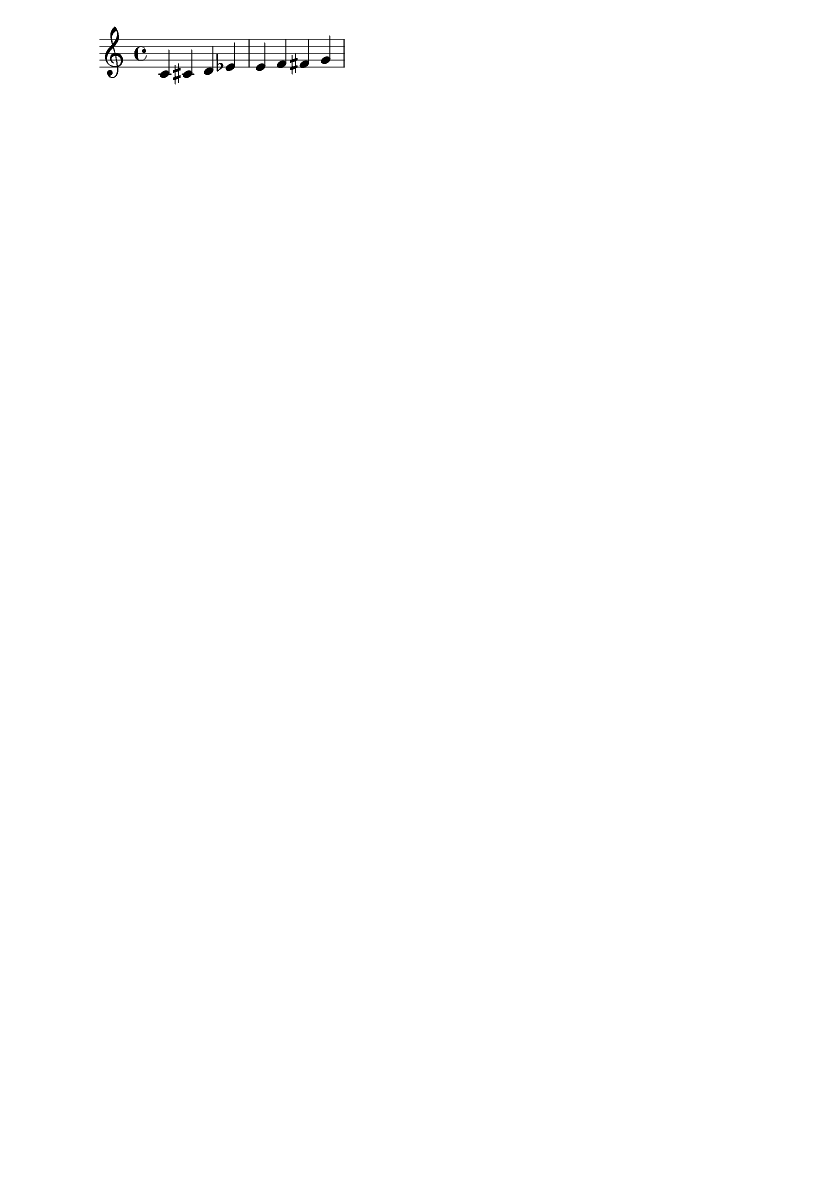

In [28]:
show(staff)

Success! But what about tablature? It turns out that Lilypond uses a variant of Staff called TabStaff for tablature. Abjad does not have a TabStaff class but does allow you to override the tag used for a staff with a `context_name` argument:

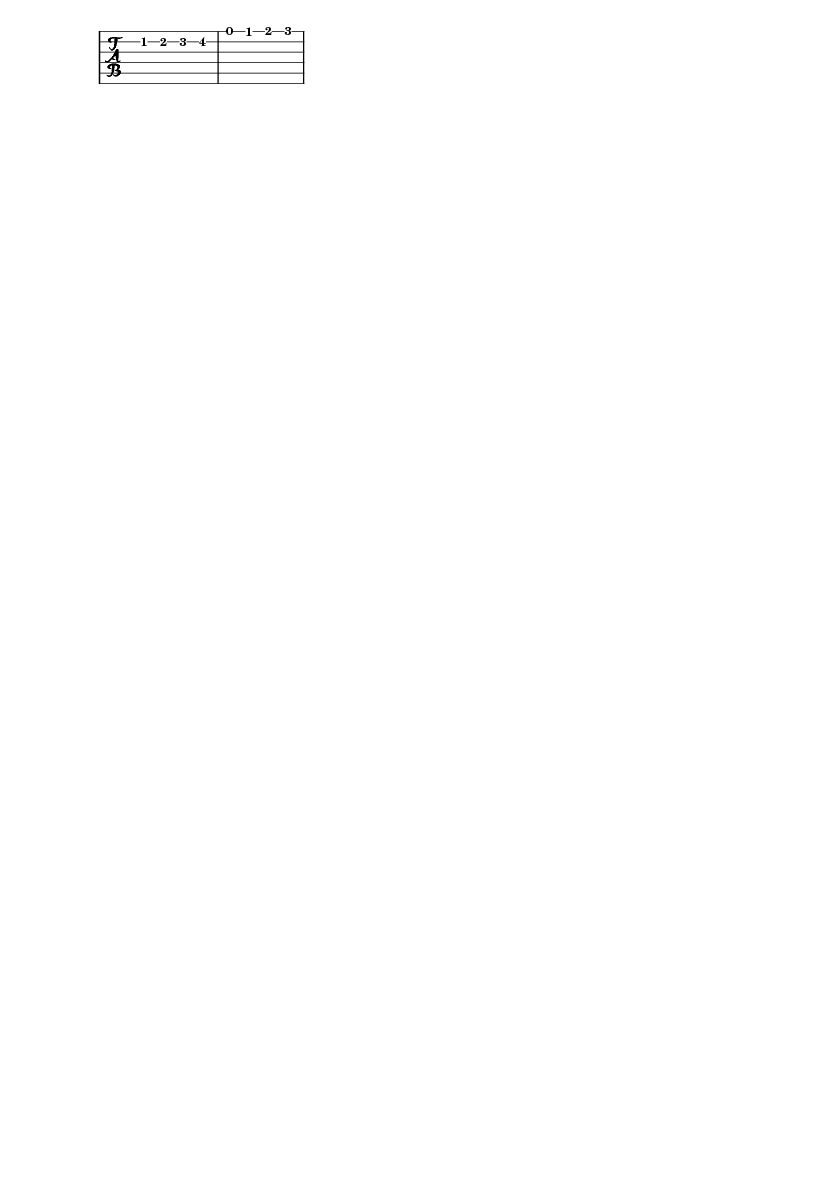

In [29]:
staff = Staff(notes, context_name='TabStaff')
show(staff)

There are a few things left I'd like to do, and I will update this post if I figure them out. First there is a lot of blank space around the output it would be nice to be rid of. Secondly I want to do guitar chord diagrams. My understanding is that these can be done in Lilypond with a tag `\fret-diagram-terse` but Abjad doesn't seem to support this so I will need to figure out how to extend it to support that. Watch this space.
